## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Jul 18 15:55:31 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.70                 Driver Version: 560.70         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti   WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   43C    P5             11W /  165W |    1047MiB /  16380MiB |     25%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = "."
print(HOME)

.


In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
torch.cuda.device_count()

1

In [5]:
torch.cuda.current_device()


0

In [6]:
torch.cuda.device(0)

In [7]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4060 Ti'

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()
a = torch.randn(1024, 1024, device=device)
b = torch.randn(1024, 1024, device=device)
c = a @ b 
#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**2,1), 'MB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**2,1), 'MB')

# 

Using device: cuda

NVIDIA GeForce RTX 4060 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


**NOTE:** Currently, YOLOv10 does not have its own PyPI package. Therefore, we need to install the code from the source.

In [2]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

**NOTE:** We will also install two additional packages: [`roboflow`](https://github.com/roboflow/roboflow-python) to download the dataset from [Roboflow Universe](https://universe.roboflow.com/), which we will use to train our model, and [`supervision`](https://github.com/roboflow/supervision), which we will use for visualizing the results.

In [2]:
!pip install -q supervision roboflow

In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
# !ls -lh {HOME}/weights

The syntax of the command is incorrect.


^C


In [ ]:
!mkdir -p {HOME}/data
# !wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
# !ls -lh {HOME}/data

The syntax of the command is incorrect.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
%cd {HOME}

!yolo task=detect mode=predict conf=0.25 save=True \
model=./weights/yolov10n.pt \
source=./data/inside-view.png

e:\programming\AquaCulture


Matplotlib is building the font cache; this may take a moment.


Ultralytics YOLOv8.1.34 🚀 Python-3.10.14 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 e:\programming\AquaCulture\data\inside-view.png: 320x640 3 birds, 331.7ms
Speed: 9.4ms preprocess, 331.7ms inference, 176.1ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs\detect\predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NONE:** Let's display result.

e:\programming\AquaCulture


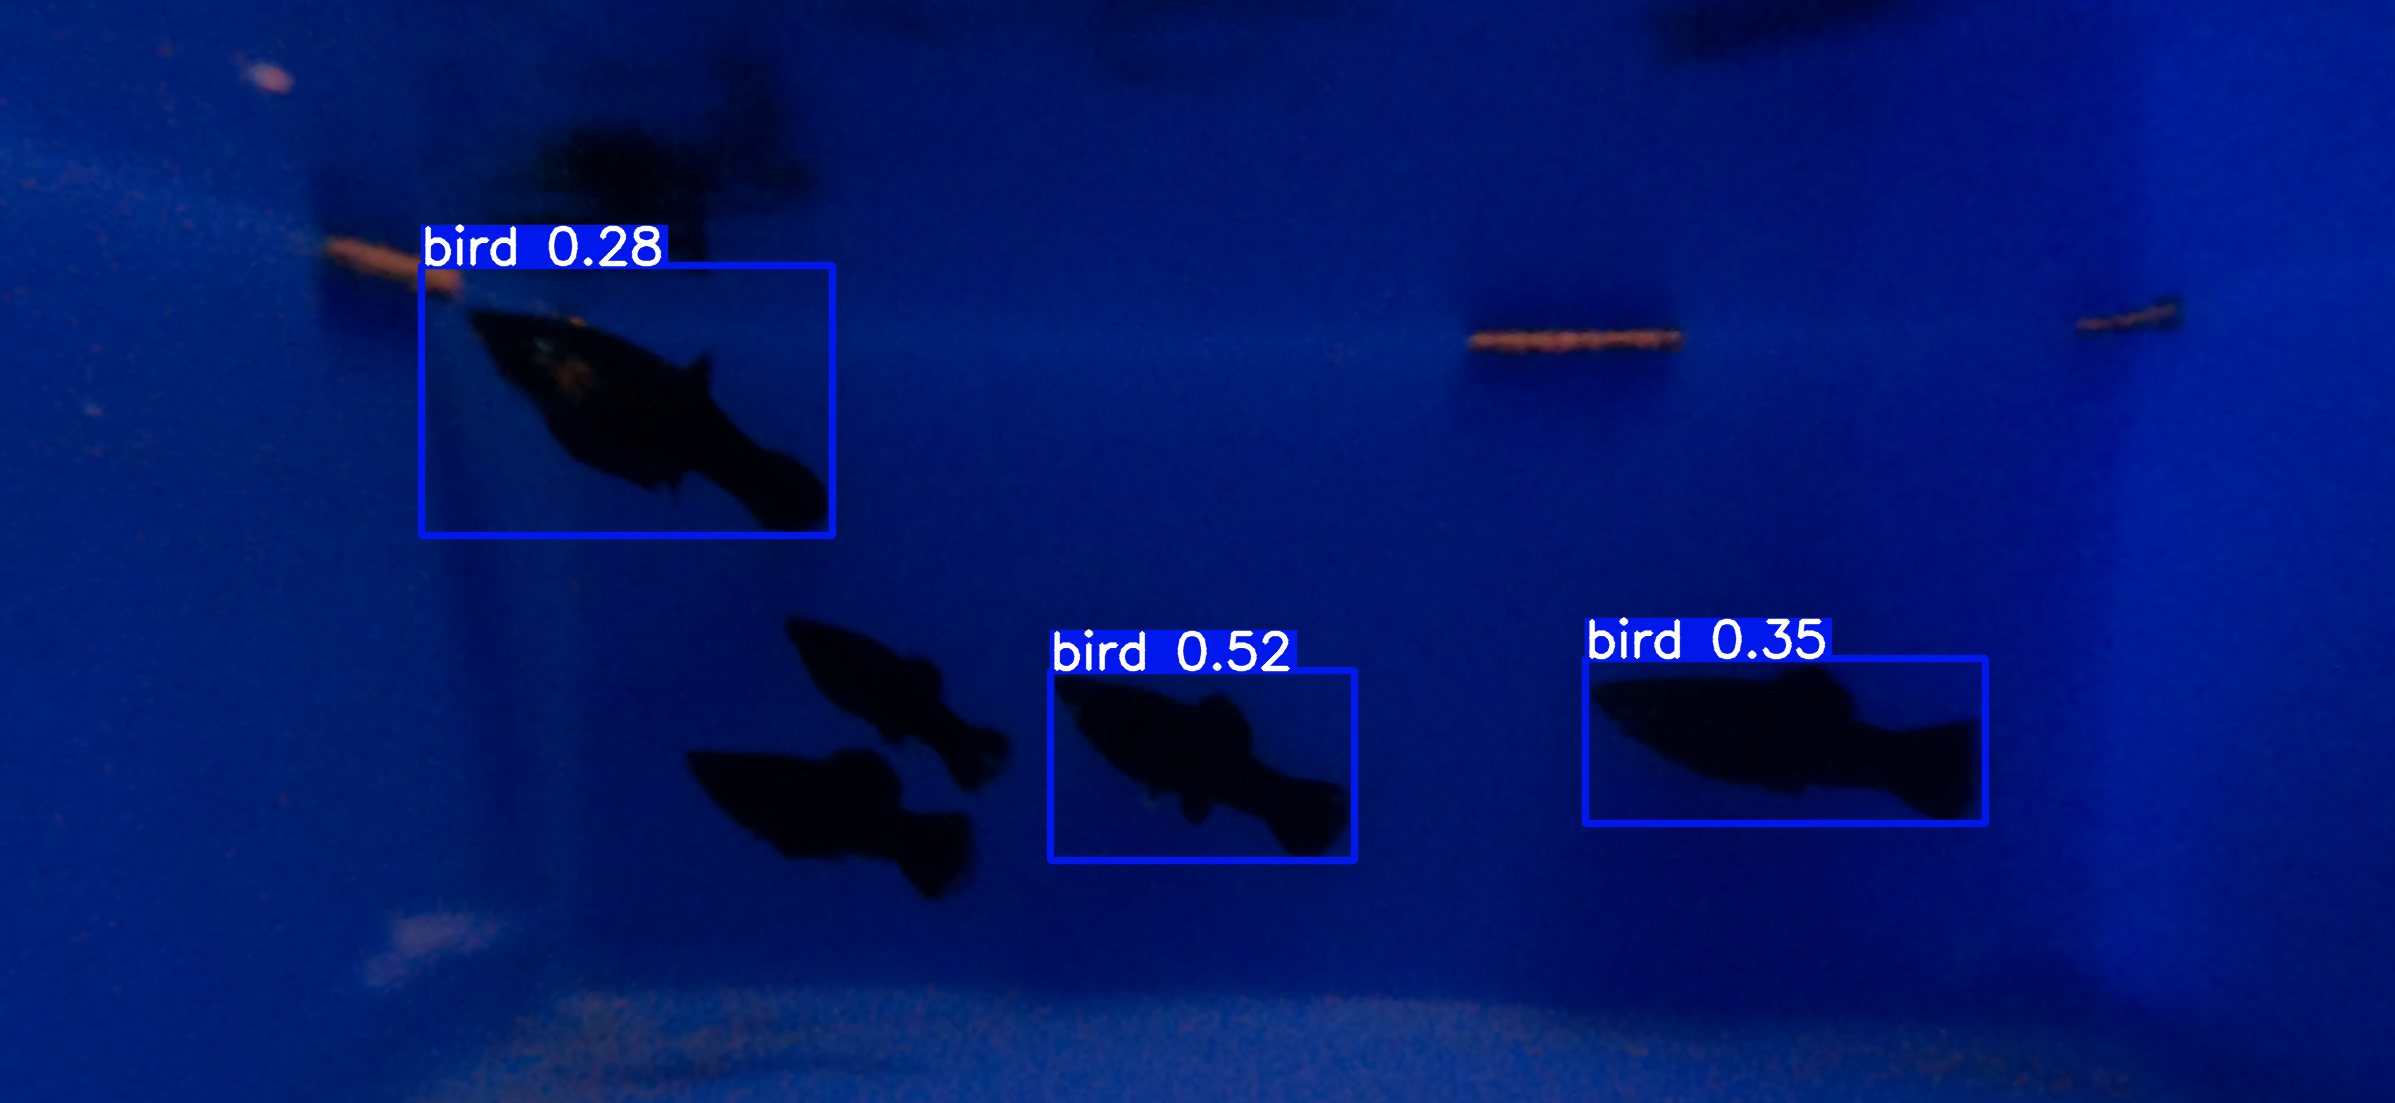

In [7]:
%cd {HOME}

from IPython.display import Image

Image(filename='runs/detect/predict/inside-view.png', height=600)

In [8]:
from ultralytics import YOLOv10

model = YOLOv10(f'./weights/yolov10n.pt')
results = model(source=f'./data/inside-view.png', conf=0.25)

c:\Users\vaibh\anaconda3\envs\pt\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



image 1/1 e:\programming\AquaCulture\data\inside-view.png: 320x640 3 birds, 259.2ms
Speed: 0.7ms preprocess, 259.2ms inference, 410.6ms postprocess per image at shape (1, 3, 320, 640)


**NONE:** Let's display result using `supervision`.


0: 320x640 3 birds, 17.3ms
Speed: 2.6ms preprocess, 17.3ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 640)


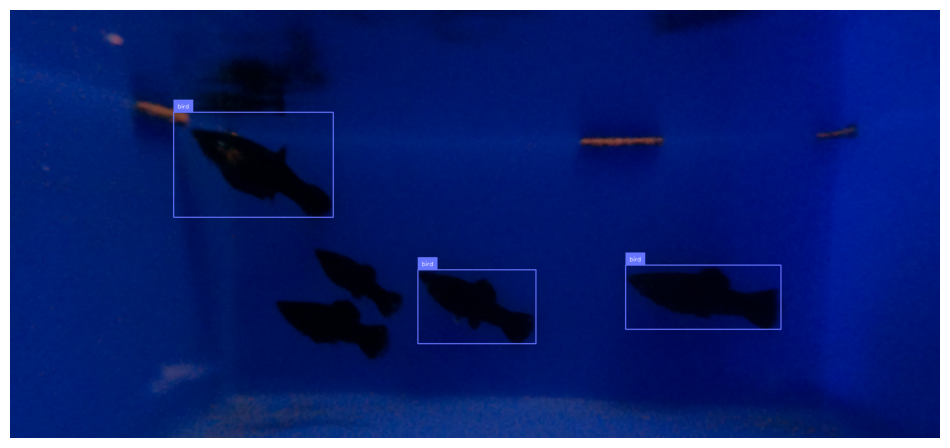

In [9]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
image = cv2.imread(f'{HOME}/data/inside-view.png')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## Custom Training

In [17]:
%cd {HOME}

!yolo task=detect mode=train epochs=5 batch=32 plots=True \
model=./weights/yolov10n.pt  data=./data.yaml device=0

e:\programming\AquaCulture
^C


In [6]:
from ultralytics import YOLOv10


model = YOLOv10('./runs/detect/yolov10s_d4_train/weights/best.pt') 

results = model.train(data="./data.yaml", epochs=100, imgsz=640, device=0, project='./runs/detect', name='yolov10s_d5_train', exist_ok=True)

New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.14 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
engine\trainer: task=detect, mode=train, model=./runs/detect/yolov10s_d4_train/weights/best.pt, data=./data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=0, workers=8, project=./runs/detect, name=yolov10s_d5_train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False,

100%|██████████| 755k/755k [00:00<00:00, 13.8MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256

train: Scanning E:\programming\AquaCulture\d5\train\labels... 630 images, 0 backgrounds, 0 corrupt: 100%|██████████| 630/630 [00:01<00:00, 459.89it/s]


train: New cache created: E:\programming\AquaCulture\d5\train\labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 108, len(boxes) = 2943. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning E:\programming\AquaCulture\d5\valid\labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 130.52it/s]

val: New cache created: E:\programming\AquaCulture\d5\valid\labels.cache


Plotting labels to runs\detect\yolov10s_d5_train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\yolov10s_d5_train
Starting training for 100 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      1/100      5.66G      1.318     0.7501      1.136      1.457     0.8406      1.186         60        640: 100%|██████████| 40/40 [00:17<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         47      0.899      0.745      0.811      0.393



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      2/100      5.83G      1.263     0.6936      1.116      1.395     0.7193      1.167         29        640: 100%|██████████| 40/40 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all         10         47      0.876      0.766      0.803      0.398



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      3/100      5.66G      1.223     0.6714      1.087      1.357     0.6969      1.128         57        640: 100%|██████████| 40/40 [00:11<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         10         47      0.901      0.774      0.865      0.407



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      4/100      5.67G      1.234     0.6709      1.097      1.358     0.6847      1.143         32        640: 100%|██████████| 40/40 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all         10         47      0.921       0.74      0.816      0.397



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      5/100      5.52G      1.198     0.6675      1.092      1.323      0.674      1.143         38        640: 100%|██████████| 40/40 [00:11<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


                   all         10         47      0.881      0.723      0.813      0.385

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      6/100      5.82G      1.159     0.6379      1.065      1.291     0.6318      1.111         41        640: 100%|██████████| 40/40 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all         10         47      0.899      0.787      0.819      0.401



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      7/100      5.67G        1.2     0.6387      1.081      1.332     0.6425      1.121         36        640: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         10         47      0.897      0.743      0.816      0.403



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      8/100      5.82G      1.162     0.6281      1.062        1.3     0.6363      1.113         62        640: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         10         47      0.912      0.766      0.852      0.428



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      9/100      5.66G      1.149     0.6249      1.068      1.277     0.6463      1.119         46        640: 100%|██████████| 40/40 [00:12<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         10         47       0.92      0.738       0.85      0.436



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     10/100      5.52G      1.121     0.6055      1.048      1.241     0.6077      1.093         53        640: 100%|██████████| 40/40 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

                   all         10         47      0.818      0.809      0.817      0.391



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     11/100      5.67G      1.129      0.605      1.038      1.271     0.5901      1.079         45        640: 100%|██████████| 40/40 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         10         47      0.835      0.787      0.821      0.408



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     12/100      5.67G        1.1     0.5998      1.045      1.224       0.59      1.083         59        640: 100%|██████████| 40/40 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all         10         47      0.905       0.83      0.872      0.429



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     13/100      5.68G      1.115      0.612      1.053      1.245     0.6065      1.087         42        640: 100%|██████████| 40/40 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         10         47      0.923      0.764      0.851      0.409



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     14/100      5.67G      1.123     0.6068      1.057      1.251     0.6001      1.095         30        640: 100%|██████████| 40/40 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         10         47      0.824      0.797      0.842      0.404



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     15/100      5.66G      1.098     0.5936      1.046      1.218     0.5899      1.077         42        640: 100%|██████████| 40/40 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all         10         47      0.878      0.764      0.814      0.388



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     16/100      5.67G      1.104     0.5972      1.045      1.236     0.5781      1.087         42        640: 100%|██████████| 40/40 [00:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

                   all         10         47      0.967      0.809       0.87      0.421



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     17/100      5.67G      1.089     0.5924      1.031      1.221     0.5699      1.072         60        640: 100%|██████████| 40/40 [00:12<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         10         47      0.939      0.787      0.862      0.422



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     18/100      5.67G       1.06     0.5756      1.031      1.189     0.5539      1.075         69        640: 100%|██████████| 40/40 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         10         47      0.961      0.766      0.848      0.399



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     19/100      5.68G      1.102     0.5855      1.038      1.234     0.5659      1.082         37        640: 100%|██████████| 40/40 [00:12<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         10         47      0.971      0.787      0.861      0.421



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     20/100      5.52G      1.051     0.5711      1.012       1.18     0.5473      1.054         35        640: 100%|██████████| 40/40 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         10         47      0.962      0.745      0.869      0.417



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     21/100      5.67G      1.062     0.5816      1.017        1.2     0.5558      1.064         59        640: 100%|██████████| 40/40 [00:12<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         10         47      0.892      0.787      0.866       0.39



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     22/100      5.52G      1.047       0.58       1.03      1.162     0.5635       1.07         55        640: 100%|██████████| 40/40 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         10         47      0.924      0.772      0.829      0.413



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     23/100      5.67G      1.044     0.5714      1.026      1.153     0.5456       1.06         37        640: 100%|██████████| 40/40 [00:12<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         10         47      0.898      0.787      0.814      0.415



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     24/100      5.67G      1.023     0.5618      1.008      1.157     0.5468      1.047         70        640: 100%|██████████| 40/40 [00:12<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         10         47       0.94      0.766      0.843      0.414



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     25/100      5.67G      1.025     0.5485      1.011      1.148     0.5249       1.05         60        640: 100%|██████████| 40/40 [00:13<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         10         47      0.973      0.781      0.859      0.411



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     26/100      5.67G      1.021     0.5515      1.008      1.149     0.5344      1.048         54        640: 100%|██████████| 40/40 [00:13<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         10         47      0.904      0.809      0.836      0.391



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     27/100      5.66G      1.041      0.557      1.015       1.16     0.5324      1.057         54        640: 100%|██████████| 40/40 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         10         47      0.921      0.809      0.859      0.425



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     28/100      5.67G          1     0.5511      1.001      1.133     0.5254      1.046         38        640: 100%|██████████| 40/40 [00:12<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         10         47      0.922      0.766      0.817      0.385



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     29/100      5.67G      1.027     0.5485      1.013      1.153     0.5272      1.054         68        640: 100%|██████████| 40/40 [00:13<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         10         47      0.876      0.766      0.815      0.389



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     30/100      5.67G     0.9922     0.5375          1      1.112     0.5218      1.042         49        640: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10         47      0.916      0.766      0.844      0.407



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     31/100      5.68G      1.011     0.5425     0.9988      1.127     0.5237      1.042         68        640: 100%|██████████| 40/40 [00:13<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         10         47      0.943      0.766      0.827      0.413



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     32/100      5.67G          1     0.5335      1.003      1.118     0.4945      1.046         59        640: 100%|██████████| 40/40 [00:13<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         10         47      0.939      0.745       0.82      0.395



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     33/100      5.52G     0.9832     0.5289     0.9919      1.098     0.5043      1.031         58        640: 100%|██████████| 40/40 [00:13<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all         10         47      0.947      0.766      0.809      0.392



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     34/100      5.67G     0.9761     0.5284     0.9922      1.089     0.4953       1.03         33        640: 100%|██████████| 40/40 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         10         47      0.897      0.766      0.816      0.397



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     35/100      5.66G     0.9447      0.518     0.9753      1.069     0.4821       1.02         47        640: 100%|██████████| 40/40 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         10         47      0.829      0.766      0.779       0.39



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     36/100      5.67G     0.9722     0.5224     0.9884      1.079     0.4871      1.029         44        640: 100%|██████████| 40/40 [00:11<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all         10         47      0.872      0.787      0.819      0.378



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     37/100      5.66G     0.9589     0.5061     0.9856      1.079     0.4718      1.023         57        640: 100%|██████████| 40/40 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         10         47      0.947      0.764      0.851      0.416



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     38/100      5.66G      0.951     0.5046     0.9808      1.072      0.476      1.015         61        640: 100%|██████████| 40/40 [00:11<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         10         47      0.915      0.745      0.833      0.405



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     39/100      5.67G     0.9484     0.5033     0.9764      1.059     0.4581       1.01         32        640: 100%|██████████| 40/40 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         10         47      0.923      0.763      0.853      0.394



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     40/100      5.66G     0.9319     0.4984     0.9736      1.054     0.4674      1.013         55        640: 100%|██████████| 40/40 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all         10         47      0.894      0.766      0.811      0.386



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     41/100      5.67G     0.9427     0.5011     0.9693      1.064     0.4617      1.006         62        640: 100%|██████████| 40/40 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         10         47      0.927      0.806      0.822      0.395



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     42/100      5.66G     0.9333     0.4991      0.971      1.039     0.4645      1.004         48        640: 100%|██████████| 40/40 [00:13<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all         10         47        0.9      0.787       0.83      0.392



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     43/100      5.67G      0.921     0.4877     0.9711      1.028      0.452      1.006         37        640: 100%|██████████| 40/40 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10         47      0.896      0.732        0.8      0.383



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     44/100      5.67G       0.92     0.4961     0.9687      1.042     0.4662      1.007         58        640: 100%|██████████| 40/40 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all         10         47      0.875      0.766      0.808      0.397



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     45/100      5.66G     0.9217     0.4954     0.9721      1.029      0.457      1.005         69        640: 100%|██████████| 40/40 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10         47        0.9      0.766      0.837      0.371



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     46/100      5.67G     0.9051     0.4875      0.966       1.01     0.4441     0.9998         35        640: 100%|██████████| 40/40 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         10         47      0.951       0.82      0.884      0.383



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     47/100      5.52G      0.916     0.4907     0.9667      1.037      0.455      1.009         46        640: 100%|██████████| 40/40 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         10         47      0.932      0.766      0.845      0.396



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     48/100      5.67G     0.8991     0.4803     0.9546      1.018     0.4403     0.9938         33        640: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         10         47       0.89      0.787      0.788      0.352



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     49/100      5.67G     0.8948      0.482     0.9629      1.014     0.4526      1.008         47        640: 100%|██████████| 40/40 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         10         47      0.877      0.761        0.8      0.369



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     50/100      5.66G     0.8977     0.4744      0.963     0.9997     0.4376     0.9988         30        640: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all         10         47      0.907      0.745      0.825      0.371



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     51/100      5.68G     0.8948     0.4811     0.9545      1.017     0.4458     0.9872         49        640: 100%|██████████| 40/40 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         10         47      0.905      0.814      0.853      0.405



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     52/100      5.67G     0.8714     0.4675     0.9566     0.9765     0.4279     0.9873         48        640: 100%|██████████| 40/40 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         10         47      0.842      0.766      0.811      0.377



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     53/100      5.68G      0.873     0.4605     0.9538     0.9848     0.4208     0.9842         50        640: 100%|██████████| 40/40 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         10         47      0.887      0.787      0.791      0.381



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     54/100      5.52G     0.8609     0.4661     0.9422     0.9786     0.4282     0.9799         35        640: 100%|██████████| 40/40 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         10         47      0.942      0.787      0.845      0.403



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     55/100      5.67G     0.8714     0.4618     0.9484     0.9841     0.4339     0.9859         47        640: 100%|██████████| 40/40 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         10         47      0.941      0.809      0.856      0.406



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     56/100      5.67G     0.8657     0.4667     0.9489     0.9796     0.4331     0.9863         52        640: 100%|██████████| 40/40 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all         10         47      0.855      0.787       0.79      0.391



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     57/100      5.66G     0.8813     0.4653     0.9551     0.9827     0.4228     0.9878         54        640: 100%|██████████| 40/40 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all         10         47      0.856      0.766      0.813      0.385



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     58/100      5.66G     0.8624     0.4621     0.9436     0.9645     0.4305     0.9771         46        640: 100%|██████████| 40/40 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         10         47      0.856      0.766      0.816      0.394



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     59/100      5.66G     0.8491     0.4512     0.9423     0.9518     0.4029     0.9707         60        640: 100%|██████████| 40/40 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

                   all         10         47        0.9       0.83      0.825       0.39



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     60/100      5.67G     0.8588     0.4608     0.9457     0.9735     0.4131     0.9787         36        640: 100%|██████████| 40/40 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         10         47      0.927      0.807      0.814      0.376



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     61/100      5.66G     0.8177     0.4401     0.9294     0.9211     0.4024     0.9619         41        640: 100%|██████████| 40/40 [00:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all         10         47      0.899      0.762      0.812      0.386



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     62/100      5.66G     0.8368     0.4423     0.9359     0.9423     0.4095     0.9662         49        640: 100%|██████████| 40/40 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         10         47      0.861      0.809      0.799      0.395



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     63/100      5.67G     0.8293     0.4354     0.9301     0.9361     0.3991     0.9615         65        640: 100%|██████████| 40/40 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all         10         47      0.892      0.766      0.812      0.396



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     64/100      5.67G     0.8182     0.4335     0.9298     0.9199     0.3946     0.9593         29        640: 100%|██████████| 40/40 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         10         47      0.905      0.807       0.83      0.385



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     65/100      5.67G      0.819     0.4364     0.9313     0.9261     0.3887     0.9632         75        640: 100%|██████████| 40/40 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all         10         47        0.9      0.764      0.797       0.38



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     66/100      5.67G     0.8057     0.4362     0.9269     0.9122     0.3938     0.9595         44        640: 100%|██████████| 40/40 [00:11<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         10         47      0.899      0.766      0.791      0.388



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     67/100      5.66G     0.8024      0.418     0.9212     0.9091     0.3698     0.9485         48        640: 100%|██████████| 40/40 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all         10         47        0.9      0.787      0.823      0.375



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     68/100      5.67G     0.7919     0.4232     0.9208     0.8968     0.3823     0.9518         48        640: 100%|██████████| 40/40 [00:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         10         47      0.856      0.766      0.794      0.388



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     69/100      5.66G     0.8108     0.4224      0.925     0.9119     0.3696     0.9568         41        640: 100%|██████████| 40/40 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         10         47      0.853      0.787      0.786      0.374



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     70/100      5.67G     0.8082     0.4265     0.9247     0.9042     0.3791     0.9517         66        640: 100%|██████████| 40/40 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all         10         47      0.927      0.808      0.813      0.367



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     71/100      5.66G     0.7925     0.4198     0.9178     0.8873     0.3742     0.9479         60        640: 100%|██████████| 40/40 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all         10         47      0.903      0.766      0.801      0.373



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     72/100      5.66G     0.7747     0.4133     0.9187     0.8696     0.3629     0.9468         45        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         10         47      0.878      0.763       0.79      0.358



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     73/100      5.67G     0.7627      0.415     0.9161     0.8644     0.3684      0.946         66        640: 100%|██████████| 40/40 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         10         47      0.856      0.787      0.806      0.376



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     74/100      5.52G     0.7848     0.4201     0.9161     0.8848     0.3758     0.9451         62        640: 100%|██████████| 40/40 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         10         47      0.922      0.809      0.839      0.368



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     75/100      5.68G     0.7851      0.418     0.9152     0.8829      0.378     0.9441         17        640: 100%|██████████| 40/40 [00:13<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         10         47      0.857      0.763      0.776      0.352



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     76/100      5.67G     0.7699     0.4177     0.9128     0.8702     0.3637     0.9426         67        640: 100%|██████████| 40/40 [00:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         10         47      0.904      0.805       0.82      0.369



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     77/100      5.82G       0.77     0.4106     0.9132     0.8727     0.3588      0.942         48        640: 100%|██████████| 40/40 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         10         47      0.921      0.809      0.829      0.388



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     78/100      5.66G     0.7606     0.4024     0.9106     0.8595     0.3525     0.9398         55        640: 100%|██████████| 40/40 [00:11<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         10         47       0.84      0.787      0.795      0.367



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     79/100      5.67G     0.7346     0.3986     0.9014     0.8363     0.3502     0.9306         58        640: 100%|██████████| 40/40 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all         10         47      0.944      0.809      0.847      0.383



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     80/100      5.68G     0.7423        0.4     0.9025     0.8426     0.3542     0.9329         45        640: 100%|██████████| 40/40 [00:11<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]

                   all         10         47      0.902      0.787       0.81      0.392



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     81/100      5.83G     0.7487     0.4007     0.9055     0.8462     0.3497     0.9343         53        640: 100%|██████████| 40/40 [00:11<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         10         47      0.912      0.745      0.821      0.376



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     82/100      5.67G     0.7422     0.4037     0.9037     0.8424     0.3628     0.9363         59        640: 100%|██████████| 40/40 [00:11<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all         10         47      0.904      0.805      0.828      0.365



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     83/100      5.67G     0.7379     0.3917     0.9034     0.8409     0.3471      0.934         55        640: 100%|██████████| 40/40 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]

                   all         10         47      0.927      0.787      0.838      0.358



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     84/100      5.66G     0.7263     0.3854     0.8965     0.8244     0.3358     0.9277         49        640: 100%|██████████| 40/40 [00:11<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10         47      0.925      0.787      0.832      0.364



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     85/100      5.67G     0.7295     0.3872     0.8972     0.8226     0.3345     0.9249         53        640: 100%|██████████| 40/40 [00:11<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all         10         47      0.926      0.804      0.843      0.396



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     86/100      5.67G     0.7307     0.3911     0.8921     0.8324     0.3362     0.9209         50        640: 100%|██████████| 40/40 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         10         47      0.876      0.787       0.82      0.369



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     87/100      5.66G      0.726     0.3915     0.8978     0.8311     0.3555     0.9326         64        640: 100%|██████████| 40/40 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         10         47      0.878      0.787      0.825      0.396



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     88/100      5.52G     0.7169      0.383     0.8912      0.819     0.3351     0.9203         51        640: 100%|██████████| 40/40 [00:11<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         10         47      0.925      0.786      0.822       0.39



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     89/100      5.66G     0.7057      0.378     0.8911     0.7988     0.3283     0.9199         52        640: 100%|██████████| 40/40 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         10         47      0.841      0.785      0.825      0.381



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     90/100      5.66G     0.7028     0.3755     0.8885     0.8045     0.3339     0.9184         54        640: 100%|██████████| 40/40 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all         10         47      0.902       0.78      0.811      0.367


Closing dataloader mosaic

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     91/100      5.66G     0.7072     0.3687     0.8939     0.7713     0.3015     0.9226         28        640: 100%|██████████| 40/40 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         10         47      0.858      0.787      0.813      0.375



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     92/100      5.66G     0.6726     0.3555     0.8859     0.7425      0.281     0.9131         29        640: 100%|██████████| 40/40 [00:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10         47      0.856      0.787      0.797      0.381



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     93/100      5.66G     0.6653     0.3503     0.8794     0.7332     0.2793     0.9047         28        640: 100%|██████████| 40/40 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         10         47      0.898      0.787      0.806      0.377



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     94/100      5.66G     0.6475     0.3453     0.8701     0.7135     0.2688     0.8944         25        640: 100%|██████████| 40/40 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all         10         47      0.869      0.766      0.797      0.374



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     95/100      5.66G     0.6463     0.3433     0.8746     0.7053     0.2685     0.8952         29        640: 100%|██████████| 40/40 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         10         47      0.874      0.787      0.794      0.391



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     96/100      5.66G     0.6429     0.3407     0.8701     0.7092     0.2595     0.8924         29        640: 100%|██████████| 40/40 [00:11<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all         10         47      0.891      0.787      0.795      0.366



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     97/100      5.66G     0.6293       0.34     0.8699     0.6901     0.2603     0.8913         27        640: 100%|██████████| 40/40 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         10         47      0.902      0.809      0.827      0.374



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     98/100      5.66G     0.6454     0.3396     0.8757     0.7064     0.2654     0.9002         28        640: 100%|██████████| 40/40 [00:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10         47      0.917      0.809      0.819      0.354



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     99/100      5.66G     0.6296     0.3378     0.8729     0.6934      0.272     0.8975         28        640: 100%|██████████| 40/40 [00:11<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all         10         47      0.878      0.787      0.792      0.372



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


    100/100      5.66G      0.631     0.3325     0.8718     0.6887     0.2525     0.8928         29        640: 100%|██████████| 40/40 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         10         47      0.878      0.787      0.791       0.37



100 epochs completed in 0.429 hours.
Optimizer stripped from runs\detect\yolov10s_d5_train\weights\last.pt, 16.5MB
Optimizer stripped from runs\detect\yolov10s_d5_train\weights\best.pt, 16.5MB

Validating runs\detect\yolov10s_d5_train\weights\best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.14 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
YOLOv10s summary (fused): 293 layers, 8035734 parameters, 0 gradients, 24.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


                   all         10         47       0.92      0.737       0.85      0.435
Speed: 0.4ms preprocess, 8.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\detect\yolov10s_d5_train


[WinError 2] The system cannot find the file specified: '{HOME}'
e:\programming\AquaCulture


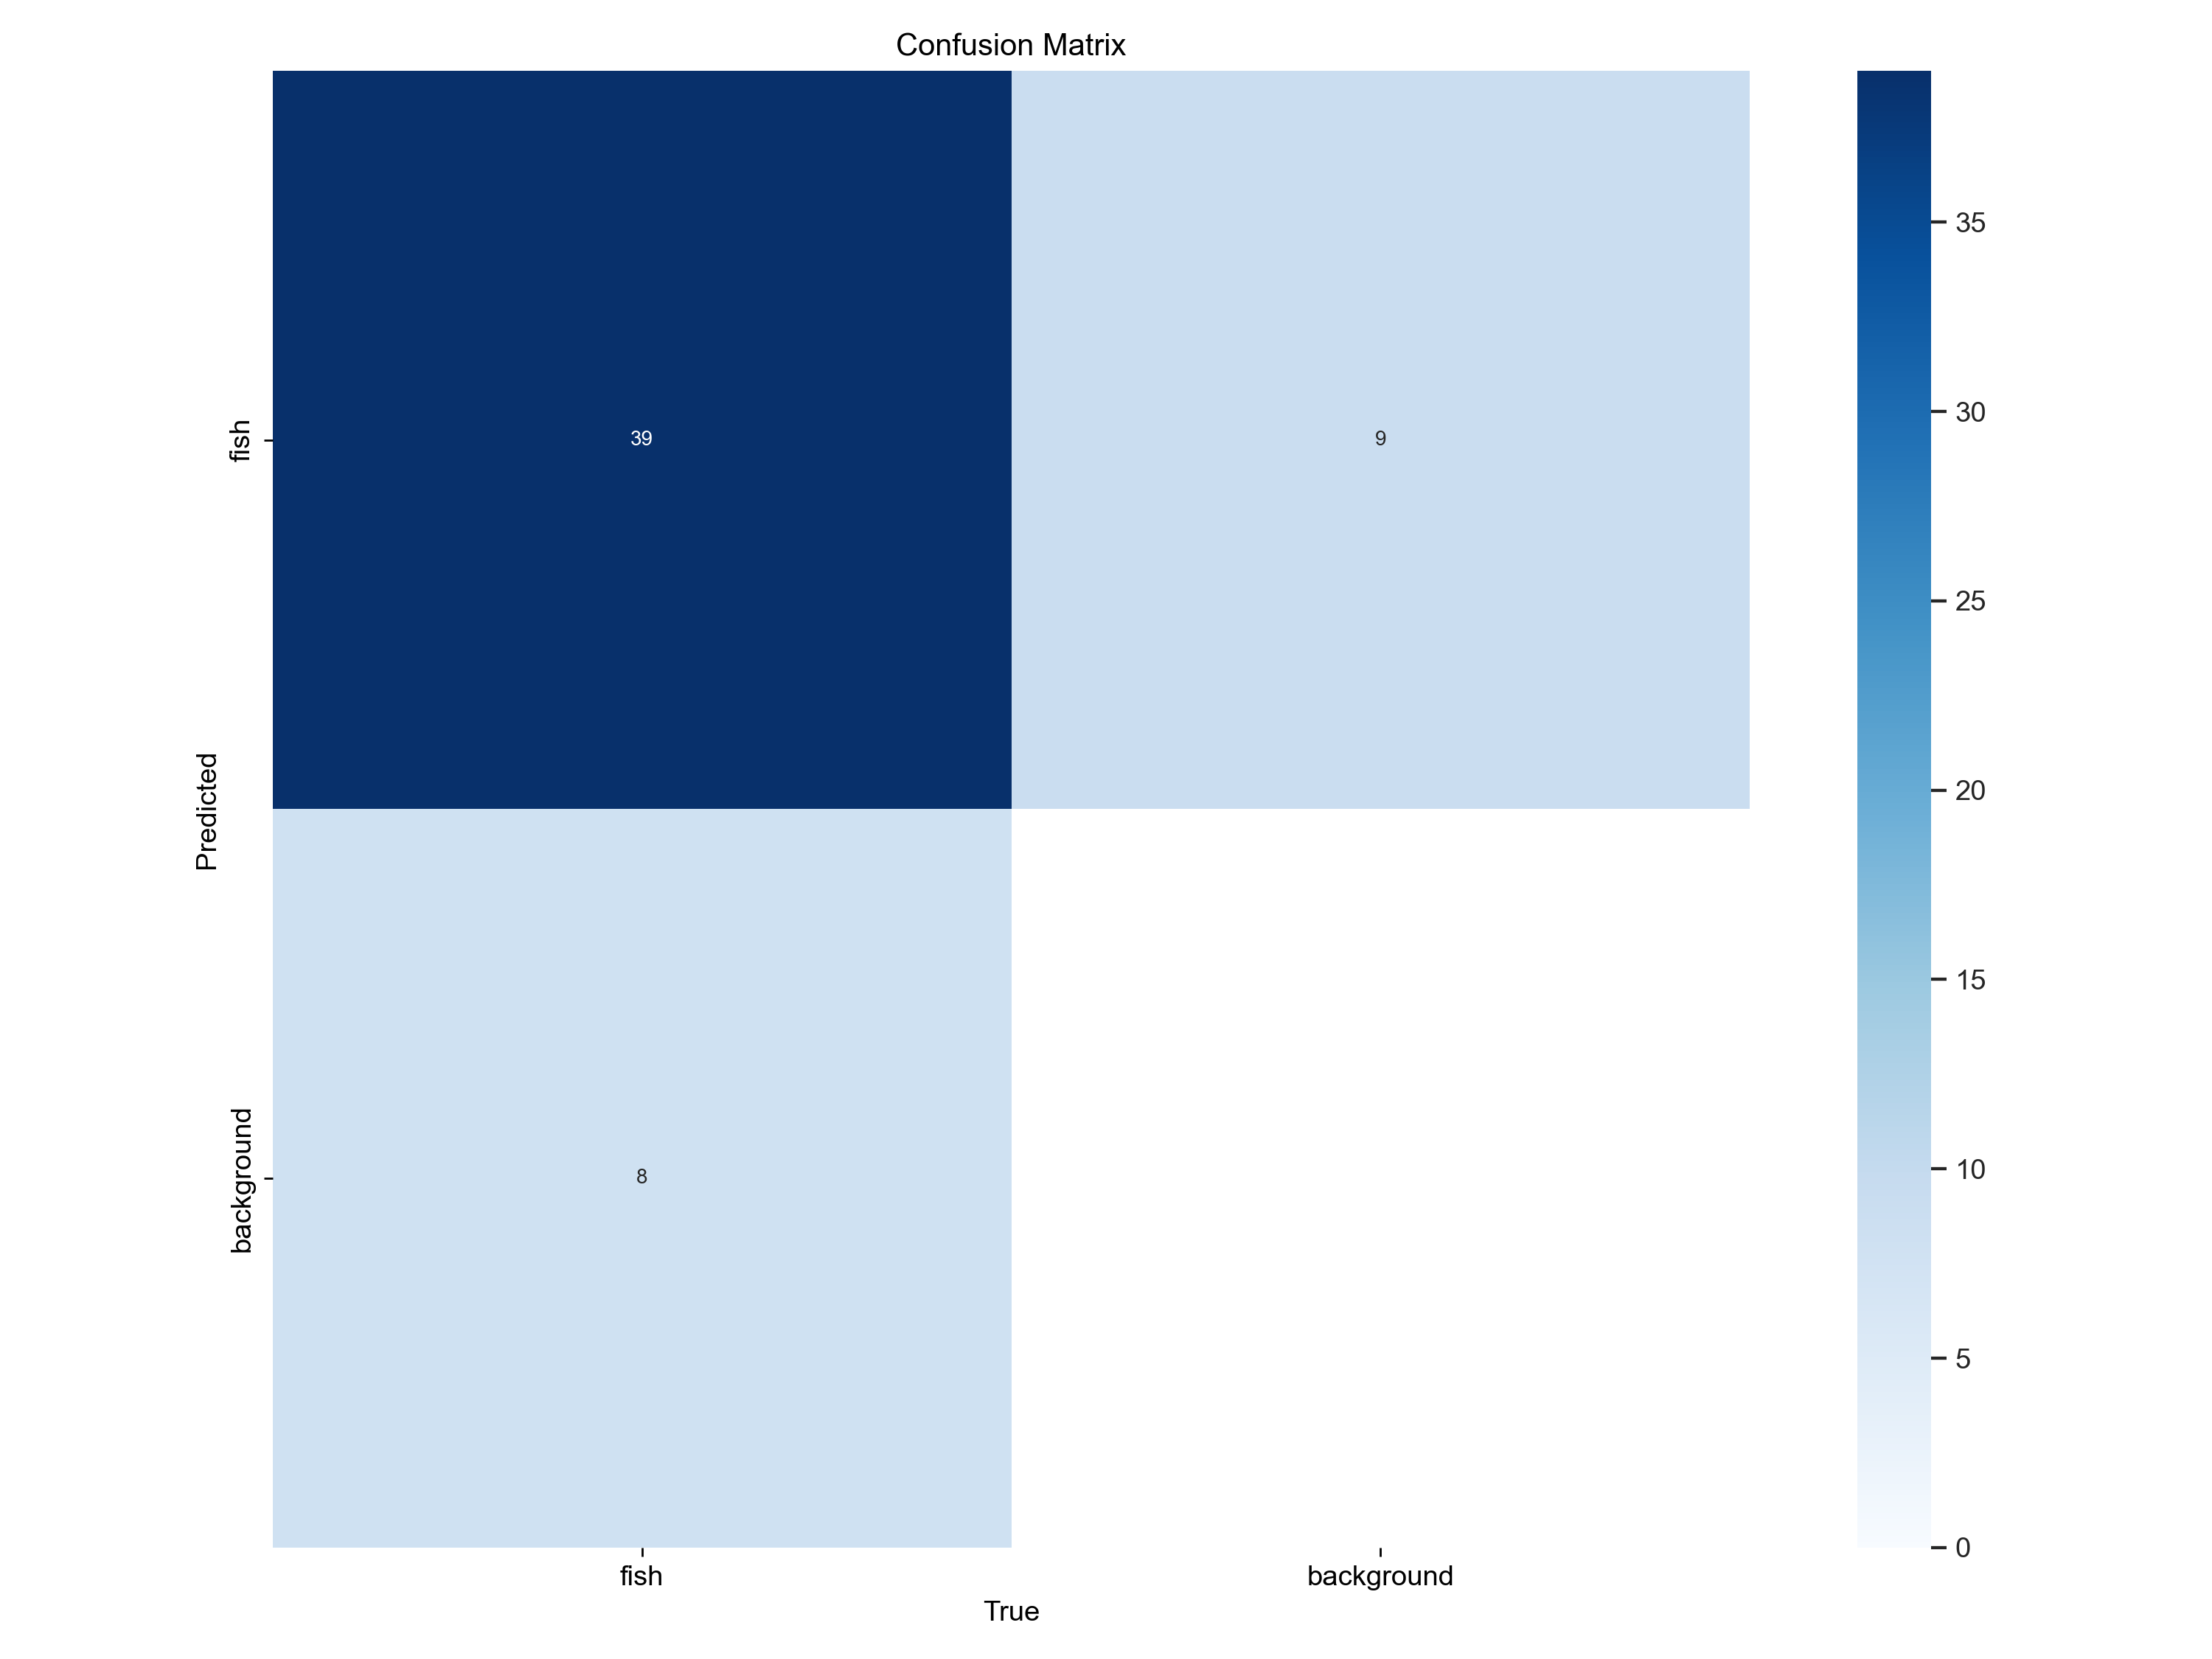

In [9]:
%cd {HOME}
Image(filename=f'./runs/detect/yolov10s_d5_train/confusion_matrix.png', width=600)

[WinError 2] The system cannot find the file specified: '{HOME}'
e:\programming\AquaCulture


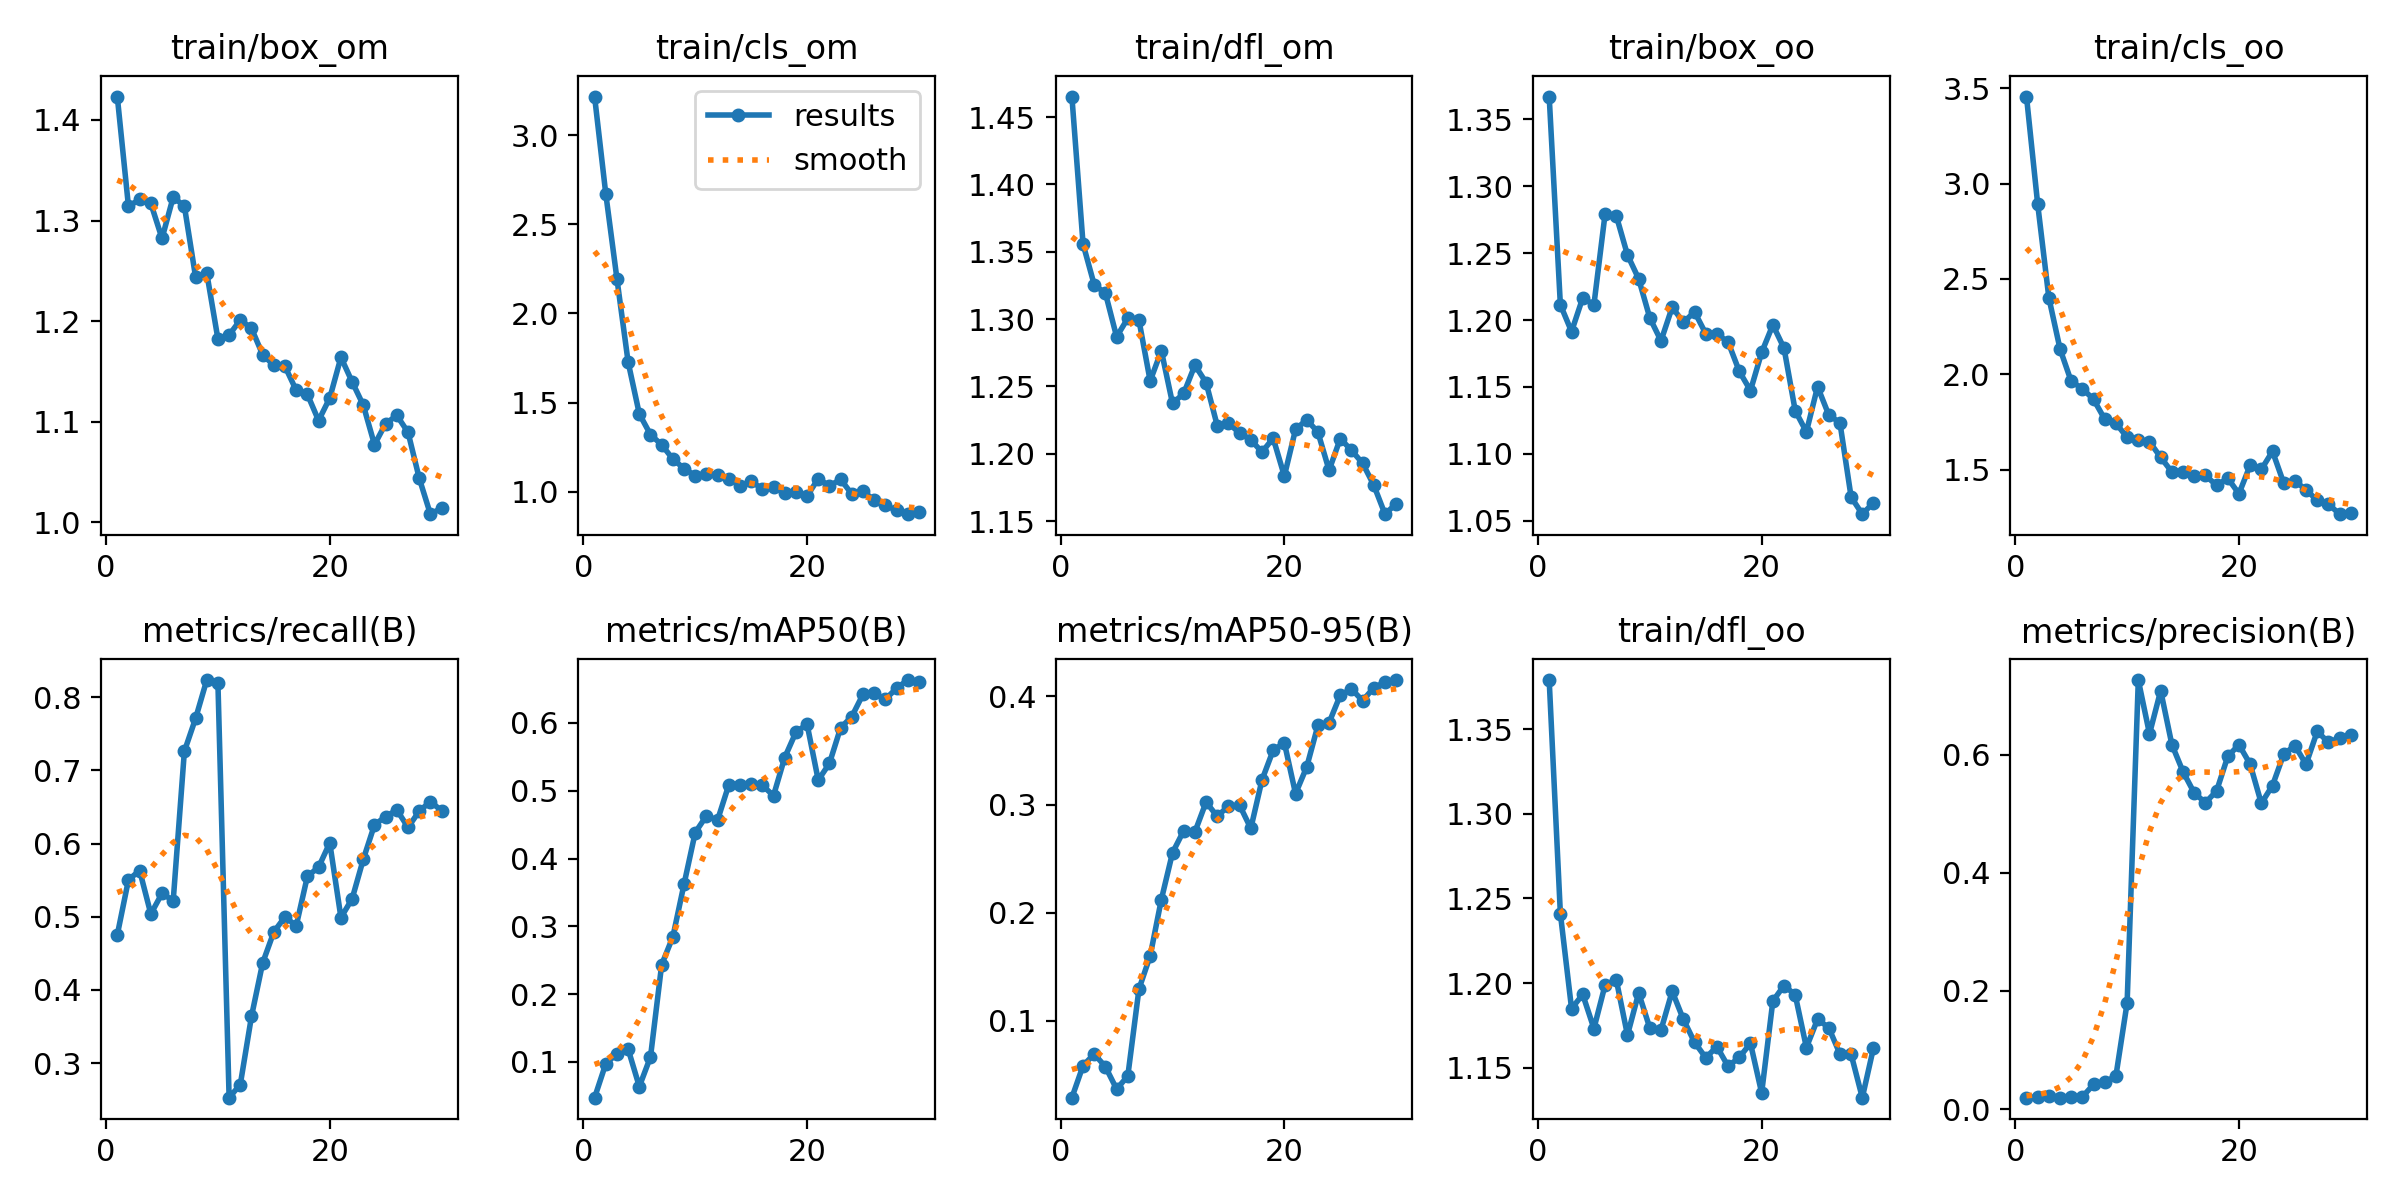

In [10]:
%cd {HOME}
Image(filename=f'./runs/detect/train/results.png', width=1200)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [ ]:
# from ultralytics import YOLOv10
# import torch
# from torch.utils.tensorboard import SummaryWriter

# # Load a model (replace with your path)
# model = YOLOv10('./weights/yolov10s.pt')

# # Set up TensorBoard writer (replace with your desired log directory)
# writer = SummaryWriter('runs/detect/yolov10s_experiment2')  # Modify path if needed

# # Train the model with GPU
# results = model.train(data="./data.yaml", epochs=30, imgsz=640, device=0,
#                       project='./runs/detect', name='yolov10s_experiment2', exist_ok=True)

In [ ]:
# def log_metrics(metrics, epoch):
#     # """Logs various YOLOv10 training metrics to TensorBoard."""
#     for metric_group, metrics_dict in metrics.items():
#         for metric_name, value in metrics_dict.items():
#             writer.add_scalar(f"{metric_group}/{metric_name}", value, epoch)

# for epoch in range(results.epochs):
#     # Extract training and validation metrics (assuming results provides dictionary access)
#     train_metrics = results.train_metrics[epoch]
#     val_metrics = results.val_metrics[epoch]

#     # Log training metrics
#     log_metrics(train_metrics, epoch)

#     # Log validation metrics
#     log_metrics(val_metrics, epoch)

#     # ... rest of your training code within the loop ...

# writer.close()  # Ensure proper closure of TensorBoard writer

In [10]:
from ultralytics import YOLOv10
import supervision as sv
model = YOLOv10(f'./runs/detect/yolov10s_d5_train/weights/best.pt')


dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"./d4_500/valid/images",
    annotations_directory_path=f"./d4_500/valid/labels",
    data_yaml_path=f"./data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

**NOTE:** Let's randomly select an image from our validation set and visualize the results.


0: 384x640 4 fishs, 248.3ms
Speed: 15.6ms preprocess, 248.3ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)


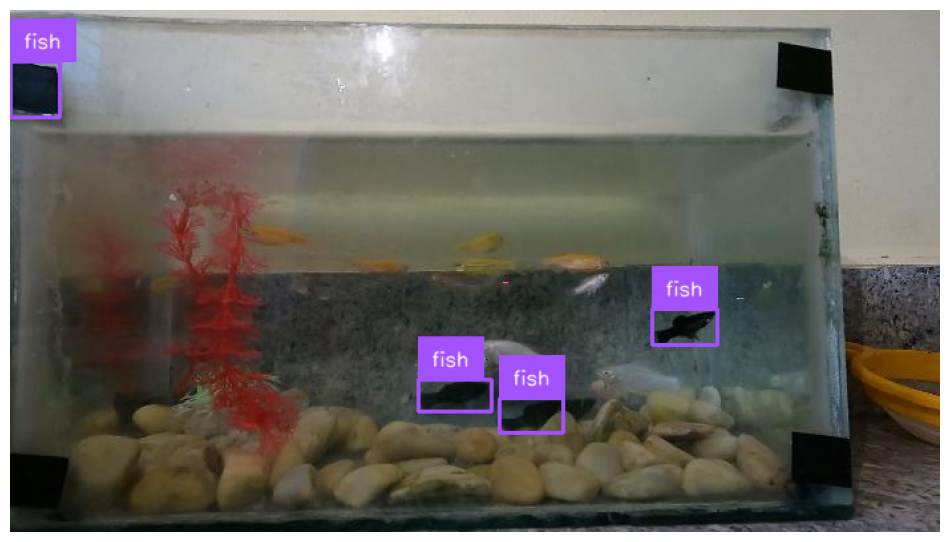

In [11]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]


results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [13]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'./runs/detect/yolov10s_d5_train/weights/best.pt') #  f'./runs/detect/yolov10l_experiment_large/weights/best.pt'   || f'./runs/detect/yolov10s_experiment2/weights/best.pt' || f'./runs/detect/yolov10m_experiment_medium/weights/best.pt'
image = cv2.imread(f'./data/fish2.png')
results = model(image, conf=0.2)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)


0: 352x640 2 fishs, 247.1ms
Speed: 3.0ms preprocess, 247.1ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)


<Figure size 1200x1200 with 1 Axes>

# FPS of video

In [14]:
import cv2
video_path = "./Feeding_Data/Tank_A/su06jun_tank_fed - Trim.mp4"
video = cv2.VideoCapture(video_path)
fps = video.get(cv2.CAP_PROP_FPS)
print(f"Frames per second (FPS): {fps}")
video.release()

Frames per second (FPS): 25.00603352303249


# Object Detection

In [ ]:
# Object detection

import numpy as np
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'./runs/detect/yolov10s_d5_train/weights/best.pt')
box_annotator = sv.BoundingBoxAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame, conf=0.2)[0]
    detections = sv.Detections.from_ultralytics(results)
    return box_annotator.annotate(frame.copy(), detections=detections)

sv.process_video(
    source_path="./data/fish2.mp4",
    target_path="./data/fish2_obj1.mp4",
    callback=callback
)

# Just Tracking Fishes

In [ ]:
#Just tracking
import numpy as np
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'./runs/detect/yolov10s_d5_train/weights/best.pt')
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame,)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    try:
        labels = [
            f"#{tracker_id} {results.names[class_id]}"
            for class_id, tracker_id
            in zip(detections.class_id, detections.tracker_id)
        ]

        annotated_frame = box_annotator.annotate(
            frame.copy(), detections=detections)
        annotated_frame = label_annotator.annotate(
            annotated_frame, detections=detections, labels=labels)
    except ValueError as e:
        print(f"ValueError encountered: {e}")
        return frame

    return trace_annotator.annotate(
        annotated_frame, detections=detections)


sv.process_video(
    source_path="./Feeding_Data/Tank_A/su06jun_tank_fed - Trim.mp4",
    target_path="./Feeding_Data/Tank_A/su06jun_tankA_fed_track1.mp4",
    callback=callback
)

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="iUaQ1ieVeECHxyBjBq4i")
project = rf.workspace().project("aquaculture2024")
version = project.version(1)

loading Roboflow workspace...
loading Roboflow project...


# Tracking and Normal Graph Code below , tracks and connects all Centroids

In [ ]:
#Tracking and normal graoph
import numpy as np
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'./runs/detect/yolov10s_d4_train/weights/best.pt')
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()

def draw_centroids_and_connections(frame, centroids):
    # Draw centroids
    for centroid in centroids:
        cv2.circle(frame, centroid, 5, (0, 0, 255), -1)  

    # Draw lines connecting the centroids
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            cv2.line(frame, centroids[i], centroids[j], (255, 0, 0), 2)  

    return frame

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame,)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    try:
        labels = [
            f"#{tracker_id} {results.names[class_id]}"
            for class_id, tracker_id
            in zip(detections.class_id, detections.tracker_id)
        ]

        annotated_frame = box_annotator.annotate(
            frame.copy(), detections=detections)
        annotated_frame = label_annotator.annotate(
            annotated_frame, detections=detections, labels=labels)
    except ValueError as e:
        print(f"ValueError encountered: {e}")
        return frame

    centroids = []
    for detection in detections.xyxy:
        x1, y1, x2, y2 = detection
        centroid_x = int((x1 + x2) / 2)
        centroid_y = int((y1 + y2) / 2)
        centroids.append((centroid_x, centroid_y))

    annotated_frame = draw_centroids_and_connections(annotated_frame, centroids)

    return trace_annotator.annotate(
        annotated_frame, detections=detections)

sv.process_video(
    source_path="./data/fish2.mp4",
    target_path="./data/fish2_track_graph.mp4",
    callback=callback
)


# Delaunay Code below , tracks and plots delaunay triangulation

In [ ]:
import numpy as np
import cv2
import supervision as sv
from scipy.spatial import Delaunay
from ultralytics import YOLOv10

model = YOLOv10(f'./runs/detect/yolov10s_d4_train/weights/best.pt')
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()

def draw_centroids_and_connections(frame, centroids):
    for centroid in centroids:
        cv2.circle(frame, centroid, 5, (0, 0, 255), -1)  

    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            cv2.line(frame, centroids[i], centroids[j], (255, 0, 0), 2)  

    return frame

def draw_delaunay(frame, centroids):
    points = np.array(centroids)
    
    if len(points) < 3:
        return draw_centroids_and_connections(frame, centroids)

    # Perform Delaunay triangulation
    delaunay_tri = Delaunay(points)

    for simplex in delaunay_tri.simplices:
        pts = points[simplex]
        cv2.polylines(frame, [pts], isClosed=True, color=(255, 0, 0), thickness=2)

    return frame

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    try:
        labels = [
            f"#{tracker_id} {results.names[class_id]}"
            for class_id, tracker_id
            in zip(detections.class_id, detections.tracker_id)
        ]

        annotated_frame = box_annotator.annotate(
            frame.copy(), detections=detections)
        annotated_frame = label_annotator.annotate(
            annotated_frame, detections=detections, labels=labels)
    except ValueError as e:
        print(f"ValueError encountered: {e}")
        return frame

    centroids = []
    for detection in detections.xyxy:
        x1, y1, x2, y2 = detection
        centroid_x = int((x1 + x2) / 2)
        centroid_y = int((y1 + y2) / 2)
        centroids.append((centroid_x, centroid_y))

    annotated_frame = draw_delaunay(annotated_frame, centroids)

    return trace_annotator.annotate(
        annotated_frame, detections=detections)

sv.process_video(
    source_path="./data/fish2.mp4",
    target_path="./data/fish2_track_delaunay.mp4",
    callback=callback
)


# Tracking with Speed of each fish

In [ ]:
import numpy as np
import supervision as sv
from ultralytics import YOLOv10
from collections import deque

model = YOLOv10(f'./runs/detect/yolov10s_d5_train/weights/best.pt')
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()

frame_rate = 25  

fish_tracks = {} 
fish_speed_buffers = {} 


buffer_size = 10

def calculate_speed(trajectory, frame_rate):
    speeds = []
    for i in range(1, len(trajectory)):
        prev = trajectory[i-1]
        curr = trajectory[i]
        distance = np.linalg.norm(np.array(curr) - np.array(prev))
        speed = distance * frame_rate
        speeds.append(speed)
    return speeds

def calculate_average_speed(speed_buffer):
    if len(speed_buffer) == 0:
        return 0
    return sum(speed_buffer) / len(speed_buffer)

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    try:
        labels = []
        for class_id, tracker_id, bbox in zip(detections.class_id, detections.tracker_id, detections.xyxy):
       
            x1, y1, x2, y2 = bbox
            centroid_x = int((x1 + x2) / 2)
            centroid_y = int((y1 + y2) / 2)
            centroid = (centroid_x, centroid_y)
            if tracker_id not in fish_tracks:
                fish_tracks[tracker_id] = deque(maxlen=buffer_size)
            fish_tracks[tracker_id].append(centroid)
            trajectory = fish_tracks[tracker_id]
            speeds = calculate_speed(trajectory, frame_rate)
            
            if tracker_id not in fish_speed_buffers:
                fish_speed_buffers[tracker_id] = deque(maxlen=buffer_size)
            
            if speeds:
                fish_speed_buffers[tracker_id].extend(speeds)
            average_speed = calculate_average_speed(fish_speed_buffers[tracker_id])

            label = f"#{tracker_id} {results.names[class_id]} Avg Speed: {average_speed:.2f} px/s"
            labels.append(label)

        annotated_frame = box_annotator.annotate(frame.copy(), detections=detections)
        annotated_frame = label_annotator.annotate(annotated_frame, detections=detections, labels=labels)
    except ValueError as e:
        print(f"ValueError encountered: {e}")
        return frame

    return trace_annotator.annotate(annotated_frame, detections=detections)

sv.process_video(
    source_path="./Feeding_Data/Tank_B/test_B.mp4",
    target_path="./Feeding_Data/Tank_B/su06jun_tankB_nofed_track_avgspeed.mp4",
    callback=callback
)


# Delauney + Tracking + Speed


In [ ]:
import numpy as np
import cv2
import supervision as sv
from scipy.spatial import Delaunay
from ultralytics import YOLOv10
from collections import deque

model = YOLOv10(f'./runs/detect/yolov10s_d5_train/weights/best.pt')
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()

frame_rate = 25  

fish_tracks = {} 
fish_speed_buffers = {} 
buffer_size = 10

def calculate_speed(trajectory, frame_rate):
    speeds = []
    for i in range(1, len(trajectory)):
        prev = trajectory[i-1]
        curr = trajectory[i]
        distance = np.linalg.norm(np.array(curr) - np.array(prev))
        speed = distance * frame_rate
        speeds.append(speed)
    return speeds

def calculate_average_speed(speed_buffer):
    if len(speed_buffer) == 0:
        return 0
    return sum(speed_buffer) / len(speed_buffer)

def calculate_flocking_index(points, delaunay_tri, num_fishes=5):
    flocking_index = 0
    for simplex in delaunay_tri.simplices:
        edge_lengths = []
        for i in range(3):
            edge_lengths.append(np.linalg.norm(points[simplex[i]] - points[simplex[(i + 1) % 3]]))
        inverse_edge_sum = sum(1 / length for length in edge_lengths)
        neighborhood_density = len(simplex) / inverse_edge_sum
        flocking_index += neighborhood_density
    normalized_flocking_index = flocking_index * (num_fishes / len(points))
    
    return normalized_flocking_index





def draw_delaunay(frame, centroids):
    points = np.array(centroids)
    
    if len(points) < 3:
        return frame
    delaunay_tri = Delaunay(points)
    flocking_index = calculate_flocking_index(points, delaunay_tri)
    min_flocking_index = 0
    max_flocking_index = 1000
    normalized_index = (flocking_index - min_flocking_index) / (max_flocking_index - min_flocking_index) * 1000
    text = f"Flocking Index: {normalized_index:.2f}"
    cv2.putText(frame, text, (frame.shape[1] - 900, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 0), 3, cv2.LINE_AA)
    
    for simplex in delaunay_tri.simplices:
        pts = points[simplex]
        cv2.polylines(frame, [pts], isClosed=True, color=(255, 0, 0), thickness=2)

    return frame

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    try:
        labels = []
        for class_id, tracker_id, bbox in zip(detections.class_id, detections.tracker_id, detections.xyxy):
            x1, y1, x2, y2 = bbox
            centroid_x = int((x1 + x2) / 2)
            centroid_y = int((y1 + y2) / 2)
            centroid = (centroid_x, centroid_y)
            if tracker_id not in fish_tracks:
                fish_tracks[tracker_id] = deque(maxlen=buffer_size)
            fish_tracks[tracker_id].append(centroid)
            trajectory = fish_tracks[tracker_id]
            speeds = calculate_speed(trajectory, frame_rate)
            
            if tracker_id not in fish_speed_buffers:
                fish_speed_buffers[tracker_id] = deque(maxlen=buffer_size)
            
            if speeds:
                fish_speed_buffers[tracker_id].extend(speeds)
            
            average_speed = calculate_average_speed(fish_speed_buffers[tracker_id])

            label = f"#{tracker_id} {results.names[class_id]} Avg Speed: {average_speed:.2f} px/s"
            labels.append(label)

        annotated_frame = box_annotator.annotate(frame.copy(), detections=detections)
        annotated_frame = label_annotator.annotate(annotated_frame, detections=detections, labels=labels)
    except ValueError as e:
        print(f"ValueError encountered: {e}")
        return frame

    centroids = []
    for detection in detections.xyxy:
        x1, y1, x2, y2 = detection
        centroid_x = int((x1 + x2) / 2)
        centroid_y = int((y1 + y2) / 2)
        centroids.append((centroid_x, centroid_y))

    annotated_frame = draw_delaunay(annotated_frame, centroids)

    return trace_annotator.annotate(annotated_frame, detections=detections)

sv.process_video(
    source_path="./Feeding_Data/Tank_A/test_A.mp4",
    target_path="./Feeding_Data/Tank_A/su06jun_tankA_flocking.mp4",
    callback=callback
)


# Flocking index + more metrics now

In [ ]:
import numpy as np
import cv2
import supervision as sv
from scipy.spatial import Delaunay
from ultralytics import YOLOv10
from collections import deque

model = YOLOv10(f'./runs/detect/yolov10s_d5_train/weights/best.pt')
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()

frame_rate = 25  

fish_tracks = {}  
fish_speed_buffers = {}  

buffer_size = 10

def calculate_speed(trajectory, frame_rate):
    speeds = []
    for i in range(1, len(trajectory)):
        prev = trajectory[i-1]
        curr = trajectory[i]
        distance = np.linalg.norm(np.array(curr) - np.array(prev))
        speed = distance * frame_rate
        speeds.append(speed)
    return speeds

def calculate_average_speed(speed_buffer):
    if len(speed_buffer) == 0:
        return 0
    return sum(speed_buffer) / len(speed_buffer)

def calculate_flocking_index(points, delaunay_tri, num_fishes=5):
    flocking_index = 0
    for simplex in delaunay_tri.simplices:
        edge_lengths = []
        for i in range(3):
            edge_lengths.append(np.linalg.norm(points[simplex[i]] - points[simplex[(i + 1) % 3]]))
        inverse_edge_sum = sum(length for length in edge_lengths)/1000
        neighborhood_density = len(simplex) / inverse_edge_sum
        flocking_index += neighborhood_density
    normalized_flocking_index = flocking_index * (num_fishes / len(points))
    
    return normalized_flocking_index*5


def calculate_average_triangle_area(points, delaunay_tri):

    total_area = 0
    triangle_count = len(delaunay_tri.simplices)

    for simplex in delaunay_tri.simplices:
        triangle_vertices = points[simplex]
        triangle_area = cv2.contourArea(triangle_vertices)
        total_area += triangle_area
    average_triangle_area = total_area / triangle_count

    return average_triangle_area

def calculate_average_triangle_edge_length(points, delaunay_tri, speeds):
    total_edge_length = 0
    edge_count = 0

    for simplex in delaunay_tri.simplices:
        for i in range(3):
            edge_length = np.linalg.norm(points[simplex[i]] - points[simplex[(i + 1) % 3]])
            total_edge_length += edge_length
            edge_count += 1
    average_triangle_edge_length = total_edge_length / edge_count

    adjusted_edge_length = average_triangle_edge_length * np.mean(speeds)

    return adjusted_edge_length

def draw_delaunay(frame, centroids):
    points = np.array(centroids)
    
    if len(points) < 3:
        return frame

    delaunay_tri = Delaunay(points)

    flocking_index = calculate_flocking_index(points, delaunay_tri)
    min_flocking_index = 0
    max_flocking_index = 1000
    normalized_index = (flocking_index - min_flocking_index) / (max_flocking_index - min_flocking_index) * 1000
    flocking_text = f"Flocking Index: {normalized_index:.2f}"

    speeds = []
    for tracker_id, trajectory in fish_tracks.items():
        speeds.extend(calculate_speed(trajectory, frame_rate))

    density_text = f"Average Triangle Area: {calculate_average_triangle_area(points, delaunay_tri)/100:.2f}"
    area_text = f"Average Triangle Edge Length: {calculate_average_triangle_edge_length(points, delaunay_tri, speeds)/1000:.2f}"

    # Determine text size
    text_size = cv2.getTextSize(flocking_text, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, 2)[0]
    box_width = text_size[0] + 20
    box_height = text_size[1] * 3 + 40

    # Draw background box
    cv2.rectangle(frame, (20, 20), (20 + 480, 20 + 150), (0, 0, 0), -1)
    cv2.rectangle(frame, (20, 20), (20 + 480, 20 + 150), (255, 255, 255), 2, cv2.LINE_AA)

    # Draw text
    cv2.putText(frame, flocking_text, (30, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.putText(frame, density_text, (30, 100), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.putText(frame, area_text, (30, 150), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1, cv2.LINE_AA)

    for simplex in delaunay_tri.simplices:
        pts = points[simplex]
        cv2.polylines(frame, [pts], isClosed=True, color=(255, 0, 0), thickness=2)
    
    return frame


def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    try:
        labels = []
        for class_id, tracker_id, bbox in zip(detections.class_id, detections.tracker_id, detections.xyxy):
            x1, y1, x2, y2 = bbox
            centroid_x = int((x1 + x2) / 2)
            centroid_y = int((y1 + y2) / 2)
            centroid = (centroid_x, centroid_y)

            if tracker_id not in fish_tracks:
                fish_tracks[tracker_id] = deque(maxlen=buffer_size)
            fish_tracks[tracker_id].append(centroid)

            trajectory = fish_tracks[tracker_id]
            speeds = calculate_speed(trajectory, frame_rate)
            
            if tracker_id not in fish_speed_buffers:
                fish_speed_buffers[tracker_id] = deque(maxlen=buffer_size)
            
            if speeds:
                fish_speed_buffers[tracker_id].extend(speeds)
            average_speed = calculate_average_speed(fish_speed_buffers[tracker_id])

            label = f"#{tracker_id} {results.names[class_id]} Avg Speed: {average_speed:.2f} px/s"
            labels.append(label)

        annotated_frame = box_annotator.annotate(frame.copy(), detections=detections)
        annotated_frame = label_annotator.annotate(annotated_frame, detections=detections, labels=labels)
    except ValueError as e:
        print(f"ValueError encountered: {e}")
        return frame

    centroids = []
    for detection in detections.xyxy:
        x1, y1, x2, y2 = detection
        centroid_x = int((x1 + x2) / 2)
        centroid_y = int((y1 + y2) / 2)
        centroids.append((centroid_x, centroid_y))

    annotated_frame = draw_delaunay(annotated_frame, centroids)

    return trace_annotator.annotate(annotated_frame, detections=detections)

sv.process_video(
    source_path="./Feeding_Data/Tank_A/test_A.mp4",
    target_path="./Feeding_Data/Tank_A/su06jun_tankA_metrics.mp4",
    callback=callback
)


# All metrics with logging into CSV

In [ ]:
import numpy as np
import cv2
import supervision as sv
from scipy.spatial import Delaunay
from ultralytics import YOLOv10
from collections import deque
import csv



model = YOLOv10(f'./runs/detect/yolov10s_d5_train/weights/best.pt')
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()

frame_rate = 25

fish_tracks = {}
fish_speed_buffers = {}
buffer_size = 10

def calculate_speed(trajectory, frame_rate):
    speeds = []
    for i in range(1, len(trajectory)):
        prev = trajectory[i-1]
        curr = trajectory[i]
        distance = np.linalg.norm(np.array(curr) - np.array(prev))
        speed = distance * frame_rate
        speeds.append(speed)
    return speeds

def calculate_average_speed(speed_buffers):
    all_speeds = []
    for speeds in speed_buffers.values():
        all_speeds.extend(speeds)
    if len(all_speeds) == 0:
        return 0
    return sum(all_speeds) / len(all_speeds)

def calculate_flocking_index(points, delaunay_tri, num_fishes=5):
    flocking_index = 0
    for simplex in delaunay_tri.simplices:
        edge_lengths = []
        for i in range(3):
            edge_lengths.append(np.linalg.norm(points[simplex[i]] - points[simplex[(i + 1) % 3]]))
        inverse_edge_sum = sum(length for length in edge_lengths)/1000
        neighborhood_density = len(simplex) / inverse_edge_sum
        flocking_index += neighborhood_density
    normalized_flocking_index = flocking_index * (num_fishes / len(points))
    
    return normalized_flocking_index*5

def calculate_average_triangle_area(points, delaunay_tri):
    total_area = 0
    triangle_count = len(delaunay_tri.simplices)

    for simplex in delaunay_tri.simplices:
        triangle_vertices = points[simplex]
        triangle_area = cv2.contourArea(triangle_vertices)
        total_area += triangle_area
    average_triangle_area = total_area / triangle_count

    return average_triangle_area

def calculate_average_triangle_edge_length(points, delaunay_tri, speeds):
    total_edge_length = 0
    edge_count = 0

    for simplex in delaunay_tri.simplices:
        for i in range(3):
            edge_length = np.linalg.norm(points[simplex[i]] - points[simplex[(i + 1) % 3]])
            total_edge_length += edge_length
            edge_count += 1
    average_triangle_edge_length = total_edge_length / edge_count

    adjusted_edge_length = average_triangle_edge_length * np.mean(speeds)

    return adjusted_edge_length

def draw_delaunay(frame, centroids):
    points = np.array(centroids)
    
    if len(points) < 3:
        for centroid in centroids:
            cv2.circle(frame, centroid, 5, (0, 0, 255), -1)  

        for i in range(len(centroids)):
            for j in range(i + 1, len(centroids)):
                cv2.line(frame, centroids[i], centroids[j], (255, 0, 0), 2)  

    else:
        delaunay_tri = Delaunay(points)

        flocking_index = calculate_flocking_index(points, delaunay_tri)
        min_flocking_index = 0
        max_flocking_index = 1000
        normalized_index = (flocking_index - min_flocking_index) / (max_flocking_index - min_flocking_index) * 1000
        flocking_text = f"Flocking Index: {normalized_index:.2f}"

        speeds = []
        for tracker_id, trajectory in fish_tracks.items():
            speeds.extend(calculate_speed(trajectory, frame_rate))

        density_text = f"Average Triangle Area: {calculate_average_triangle_area(points, delaunay_tri)/100:.2f}"
        area_text = f"Average Triangle Edge Length: {calculate_average_triangle_edge_length(points, delaunay_tri, speeds)/1000:.2f}"
        text_size = cv2.getTextSize(flocking_text, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, 2)[0]
        box_width = text_size[0] + 20
        box_height = text_size[1] * 3 + 40
        cv2.rectangle(frame, (20, 20), (20 + 480, 20 + 150), (0, 0, 0), -1)
        cv2.rectangle(frame, (20, 20), (20 + 480, 20 + 150), (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(frame, flocking_text, (30, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1, cv2.LINE_AA)
        cv2.putText(frame, density_text, (30, 100), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1, cv2.LINE_AA)
        cv2.putText(frame, area_text, (30, 150), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1, cv2.LINE_AA)

        for simplex in delaunay_tri.simplices:
            pts = points[simplex]
            cv2.polylines(frame, [pts], isClosed=True, color=(255, 0, 0), thickness=2)

    return frame, len(points)


def log_metrics_to_csv(frame_number, flocking_index, avg_triangle_area, avg_edge_length, average_speed, y_label):
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([frame_number, flocking_index, avg_triangle_area, avg_edge_length, average_speed, y_label])

def callback(frame: np.ndarray, frame_number: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    try:
        labels = []
        for class_id, tracker_id, bbox in zip(detections.class_id, detections.tracker_id, detections.xyxy):
            x1, y1, x2, y2 = bbox
            centroid_x = int((x1 + x2) / 2)
            centroid_y = int((y1 + y2) / 2)
            centroid = (centroid_x, centroid_y)

            if tracker_id not in fish_tracks:
                fish_tracks[tracker_id] = deque(maxlen=buffer_size)
            fish_tracks[tracker_id].append(centroid)

            trajectory = fish_tracks[tracker_id]
            speeds = calculate_speed(trajectory, frame_rate)
            
            if tracker_id not in fish_speed_buffers:
                fish_speed_buffers[tracker_id] = deque(maxlen=buffer_size)
            
            if speeds:
                fish_speed_buffers[tracker_id].extend(speeds)
            average_speed = calculate_average_speed(fish_speed_buffers)

            label = f"#{tracker_id} {results.names[class_id]} Avg Speed: {average_speed:.2f} px/s"
            labels.append(label)

        annotated_frame = box_annotator.annotate(frame.copy(), detections=detections)
        annotated_frame = label_annotator.annotate(annotated_frame, detections=detections, labels=labels)
    except ValueError as e:
        print(f"ValueError encountered: {e}")
        return frame

    centroids = []
    for detection in detections.xyxy:
        x1, y1, x2, y2 = detection
        centroid_x = int((x1 + x2) / 2)
        centroid_y = int((y1 + y2) / 2)
        centroids.append((centroid_x, centroid_y))
    annotated_frame , len_p = draw_delaunay(annotated_frame, centroids)
    if len_p > 3:
        flocking_index = calculate_flocking_index(np.array(centroids), Delaunay(np.array(centroids)))
        avg_triangle_area = calculate_average_triangle_area(np.array(centroids), Delaunay(np.array(centroids)))/100
        avg_edge_length = calculate_average_triangle_edge_length(np.array(centroids), Delaunay(np.array(centroids)), speeds)/1000
        log_metrics_to_csv(frame_number, flocking_index, avg_triangle_area, avg_edge_length, average_speed, y_label)

    return trace_annotator.annotate(annotated_frame, detections=detections)


y_label = "hungry" 
csv_file_path = "./Feeding_Data/Tank_B/Metrics/TankB_log_metrics_1.csv"
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "Frame", "Flocking Index", "Avg Triangle Area", 
        "Avg Triangle Edge Length", "Average Speed", "Y_Label"
    ])
sv.process_video(
    source_path="./Feeding_Data/Tank_B/su06jun_tankb_nofedt.mp4",
    target_path="./Feeding_Data/Tank_B/su06jun_tankB_log_metrics_1.mp4",
    callback=callback
)
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
# y_label = "well-fed" 
# csv_file_path = "./Feeding_Data/Tank_A/Metrics/TankA_log_metrics_1.csv"
# with open(csv_file_path, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow([
#         "Frame", "Flocking Index", "Avg Triangle Area", 
#         "Avg Triangle Edge Length", "Average Speed", "Y_Label"
#     ])
# sv.process_video(
#     source_path="./Feeding_Data/Tank_A/su06jun_tank_fed - Trim.mp4",
#     target_path="./Feeding_Data/Tank_A/su06jun_tankA_log_metrics_1.mp4",
#     callback=callback
# )
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
# y_label = "well-fed" 
# csv_file_path = "./Feeding_Data/Tank_A/Metrics/testA_metrics_log.csv"
# with open(csv_file_path, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow([
#         "Frame", "Flocking Index", "Avg Triangle Area", 
#         "Avg Triangle Edge Length", "Average Speed", "Y_Label"
#     ])
# sv.process_video(
#     source_path="./Feeding_Data/Tank_A/test_A.mp4",
#     target_path="./Feeding_Data/Tank_A/su06jun_tankA_log_metrics.mp4",
#     callback=callback
# )
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
# y_label = "hungry" 
# csv_file_path = "./Feeding_Data/Tank_B/Metrics/testB_metrics_log.csv"
# with open(csv_file_path, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow([
#         "Frame", "Flocking Index", "Avg Triangle Area", 
#         "Avg Triangle Edge Length", "Average Speed", "Y_Label"
#     ])
# sv.process_video(
#     source_path="./Feeding_Data/Tank_B/test_B.mp4",
#     target_path="./Feeding_Data/Tank_B/su06jun_tankB_log_metrics.mp4",
#     callback=callback
# )
